In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import sys 
sys.path.append("..") 
from utils import get_st,compute_exe,compute_kat
import matplotlib.ticker as mtick
plt.rcParams["font.family"] = "Gill Sans"

/var/folders/38/_6s3q88d5fz9wnk2cl9lfgsr0000gn/T/ipykernel_6839/1542432376.py:97: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[1][i].set_ylim( carbon_list1[2*i]-(abs(carbon_list1[2*i+1]-carbon_list1[2*i]))/2 ,carbon_list1[2*i+1]+(abs(carbon_list1[2*i+1]-carbon_list1[2*i]))/2)
feat NOT subset; don't know how to subset; dropped
fond NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


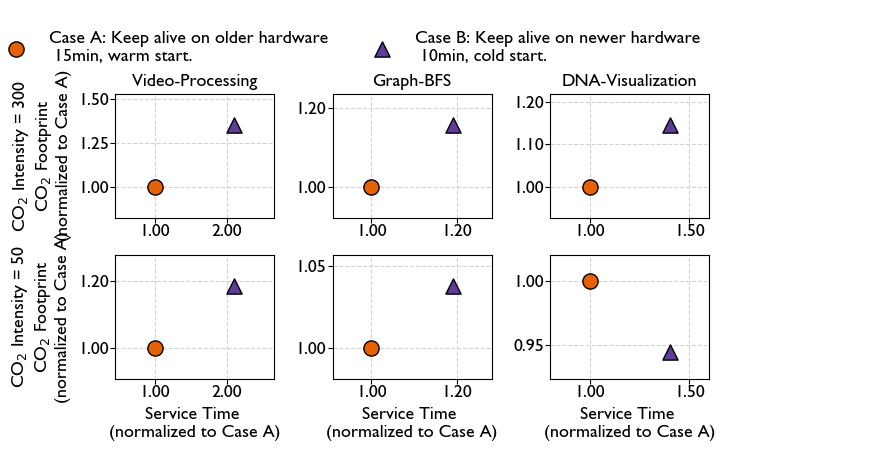

In [2]:
carbon_intensity = 300
ci = 50
server_pairs= [['c5','m5zn']]
apps = ['video','bfs-1000k','dna']

old_kat = 15
new_kat = 10
old_cold = False
new_cold = True

fig, axs = plt.subplots(nrows=2, ncols=len(apps), gridspec_kw={'hspace': 0.3, 'wspace': 0.37, 'bottom': 0.2, 
                    'top': 0.77, 'right':1, 'left':-0.1}, figsize=(5.4,5))
colors = ["#5B24AA", "#01329B"] 

#o old ^ new
markers = ['o', '^']
carbon_list = []
carbon_list1 = []
st_list = []
XLABEL = "Service Time \n(normalized to Case A)"
server_type = ['old','new']
TITLE = ["Video-Processing", "Graph-BFS","DNA-Visualization"]
for i, app in enumerate(apps):
    for j in range(2):
        server = server_pairs[0][j]
        if j==0:
            if old_cold:
                st = get_st(app,server)[0]
                carbon = compute_exe(app, server_pairs[0],carbon_intensity)[0][j]+compute_kat(app, server_pairs[0][j], old_kat, carbon_intensity)
                carbon1 = compute_exe(app, server_pairs[0],ci)[0][j]+compute_kat(app, server_pairs[0][j], old_kat, ci)
            else:
                st = get_st(app,server)[1]
                carbon = compute_exe(app, server_pairs[0],carbon_intensity)[1][j]+compute_kat(app, server_pairs[0][j], old_kat, carbon_intensity)
                carbon1 = compute_exe(app, server_pairs[0],ci)[1][j]+compute_kat(app, server_pairs[0][j], old_kat, ci)
            #st 
            # 2.7168889999999997
            # 6.708508999999999
            # 12.32903
            # carbon 1
            #             0.019921450730868994
            # 0.029269633943084076
            # 0.06176478090252128
            #carbon
            #print(carbon)
#             0.0709216589208462
# 0.11035621333009779
# 0.178378491134806
            st = 1
            carbon1 = 1
            carbon = 1
            axs[0][i].scatter(x=st, y=carbon, color='#e66101', label=server_type[j], s=120, zorder=3, alpha=1, edgecolors="black", marker=markers[j])
            axs[1][i].scatter(x=st, y=carbon1, color='#e66101', label=server_type[j], s=120, zorder=3, alpha=1, edgecolors="black", marker=markers[j])
        else:
            if new_cold:
                st = get_st(app,server)[0]
                carbon = compute_exe(app, server_pairs[0],carbon_intensity)[0][j]+compute_kat(app, server_pairs[0][j], new_kat, carbon_intensity)
                carbon1 = compute_exe(app, server_pairs[0],ci)[0][j]+compute_kat(app, server_pairs[0][j], new_kat, ci)
            else:
                st = get_st(app,server)[1]
                carbon = compute_exe(app, server_pairs[0],carbon_intensity)[1][j]+compute_kat(app, server_pairs[0][j], new_kat, carbon_intensity)
                carbon1 = compute_exe(app, server_pairs[0],ci)[1][j]+compute_kat(app, server_pairs[0][j], new_kat, ci)
            if i == 0:
                st = st/2.7168889999999997
                carbon = carbon/0.0709216589208462
                carbon1 = carbon1/0.019921450730868994
            elif i == 1:
                st = st/6.708508999999999
                carbon = carbon/0.11035621333009779
                carbon1 = carbon1/0.029269633943084076
            else:
                st = st/12.32903
                carbon = carbon/0.178378491134806
                carbon1 = carbon1/0.06176478090252128
            axs[0][i].scatter(x=st, y=carbon, color='#5e3c99', label=server_type[j], s=120, zorder=3, alpha=1, edgecolors="black", marker=markers[j])
            axs[1][i].scatter(x=st, y=carbon1, color='#5e3c99', label=server_type[j], s=120, zorder=3, alpha=1, edgecolors="black", marker=markers[j])
            
        
        
        axs[0][i].grid(which='both', axis='both', color='lightgrey', ls='dashed', zorder=0)
        axs[1][i].grid(which='both', axis='both', color='lightgrey', ls='dashed', zorder=0)
        axs[1][i].set_xlabel(XLABEL, fontsize=13)
        axs[0][i].set_title(TITLE[i], fontsize = 13
                            )
        axs[0][i].tick_params(axis='both', which='major', pad=1, labelsize=13)
        axs[1][i].tick_params(axis='both', which='major', pad=1, labelsize=13)
        carbon_list.append(carbon)
        carbon_list1.append(carbon1)
        st_list.append(st)

for i in range(2):
    axs[i][0].set_xlim( round(st_list[0]-(st_list[1]-st_list[0])/2,2 ),round(st_list[1]+(st_list[1]-st_list[0])/2,2))
    axs[i][1].set_xlim( round(st_list[2]-(st_list[3]-st_list[2])/2,2) ,round(st_list[3]+(st_list[3]-st_list[2])/2,2))
    axs[i][2].set_xlim( round(st_list[4]-(st_list[5]-st_list[4])/2,2) ,round(st_list[5]+(st_list[5]-st_list[4])/2,2))
for i in range(3):
    axs[0][i].set_ylim( carbon_list[2*i]-(carbon_list[2*i+1]-carbon_list[2*i])/2 ,carbon_list[2*i+1]+(carbon_list[2*i+1]-carbon_list[2*i])/2)
for i in range(3):
    axs[1][i].set_ylim( carbon_list1[2*i]-(abs(carbon_list1[2*i+1]-carbon_list1[2*i]))/2 ,carbon_list1[2*i+1]+(abs(carbon_list1[2*i+1]-carbon_list1[2*i]))/2)
for i in range(3):
    axs[0][i].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    axs[1][i].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    axs[0][i].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    axs[1][i].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# axs[0][0].set_xlim(0,3)
# axs[0][0].set_ylim(0.5,1.5)

axs[0][0].set_ylabel("CO$_2$ Intensity = 300\nCO$_2$ Footprint\n(normalized to Case A)", fontsize=13)
axs[1][0].set_ylabel("CO$_2$ Intensity = 50\nCO$_2$ Footprint\n(normalized to Case A)", fontsize=13,labelpad=5)
fig.legend(loc=(-0.01,0.84), frameon = False ,ncol=2,labels=["Case A: Keep alive on older hardware\n 15min, warm start.","Case B: Keep alive on newer hardware\n 10min, cold start."], fontsize=13)

plt.savefig("motiv3.pdf",bbox_inches='tight')